<a href="https://colab.research.google.com/github/asiabak/Licencjat-modele/blob/main/LSTM_from_git_Claude_corrections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Install required packages
import sys

def install_and_import(package):
    import importlib
    try:
        importlib.import_module(package)
        print(f"✓ {package} is already installed")
    except ImportError:
        !pip install {package}
        print(f"✓ {package} has been installed")

# Main required packages
packages = ["gensim", "tensorflow", "pandas", "matplotlib", "scikit-learn", "seaborn"]
for package in packages:
    install_and_import(package)

# Import and verify key packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import gensim
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
import seaborn as sns
import time

# Print versions to verify
print("\nPackage versions:")
print(f"Python: {sys.version}")
print(f"TensorFlow: {tf.__version__}")
print(f"Keras: {keras.__version__}")
print(f"Gensim: {gensim.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")

# Check for GPU availability
print("\nGPU Available:", tf.config.list_physical_devices('GPU'))

# Function to check for required data files
def check_file(filename):
    import os
    if os.path.isfile(filename):
        print(f"✓ File '{filename}' exists")
    else:
        print(f"✗ File '{filename}' not found! You need to upload this file.")

print("\nChecking for required data files:")
check_file("filmweb_jednolity_sentyment.csv")
check_file("nkjp.txt")

print("\nSetup complete! You're ready to run the LSTM model.")

✓ gensim is already installed
✓ tensorflow is already installed
✓ pandas is already installed
✓ matplotlib is already installed
✓ scikit-learn has been installed
✓ seaborn is already installed

Package versions:
Python: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
TensorFlow: 2.18.0
Keras: 3.9.1
Gensim: 4.3.3
NumPy: 1.26.4
Pandas: 2.2.2

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Checking for required data files:
✓ File 'filmweb_jednolity_sentyment.csv' exists
✗ File 'nkjp.txt' not found! You need to upload this file.

Setup complete! You're ready to run the LSTM model.


Initializing...
                                              review  sentiment
0  Totalna inwigilacja, grupa trzymająca wszelką ...         -1
1  Barwne życie Wyatta Earpa stało się inspiracją...          1
2  Po niedawnym sukcesie Coś za mną chodzi można ...          0
3  Inspektora Harry’ego Callahana przedstawiać ni...          0
4  W "Nosferatu - symfonia grozy" wysysacz krwi-a...          1
X_train shape: (2497,)
X_test shape: (781,)
X_val shape: (625,)
y_train shape: (2497,)
y_test shape: (781,)
y_val shape: (625,)
Shape of embedding matrix:  (2283377, 300)
Found 116795 unique tokens.
{'w': 1, 'i': 2, 'się': 3, 'z': 4, 'nie': 5, 'na': 6, 'to': 7, 'jest': 8, 'do': 9, 'że': 10, 'a': 11, 'o': 12, 'jak': 13, '–': 14, 'ale': 15, 'po': 16, 'co': 17, 'jednak': 18, 'film': 19, 'tym': 20, 'od': 21, 'tak': 22, 'za': 23, 'przez': 24, 'jego': 25, 'czy': 26, 'dla': 27, 'który': 28, 'filmu': 29, 'tego': 30, 'tylko': 31, 'ma': 32, 'są': 33, 'już': 34, 'może': 35, 'bardzo': 36, 'ze': 37, 'które

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     685,013,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 685,013,100 (2.55 GB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 685,013,100 (2.55 GB)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 277ms/step - accuracy: 0.4905 - loss: 1.0296 - val_accuracy: 0.4816 - val_loss: 1.0735
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 238ms/step - accuracy: 0.4588 - loss: 1.0238 - val_accuracy: 0.4816 - val_loss: 1.0529
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - accuracy: 0.4963 - loss: 1.0102 - val_accuracy: 0.4816 - val_loss: 1.0538
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.4854 - loss: 1.0221 - val_accuracy: 0.4816 - val_loss: 1.0475
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - accuracy: 0.4690 - loss: 1.0204 - val_accuracy: 0.4816 - val_loss: 1.0427
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.4866 - loss: 1.0188 - val_accuracy: 0.4816 - val_loss: 1.0493
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.4813 - loss: 1.0214 - val_accuracy: 0.4816 - val_loss: 1.0451
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - accuracy: 0.4769 - loss: 1.0158 - val_accu

Save model...
Saved model to disk...
Save Word index...
Saved word index to disk...
Test Loss: 104.90%
Test Accuracy: 45.60%
Training completed in :500.7933645248413 s.


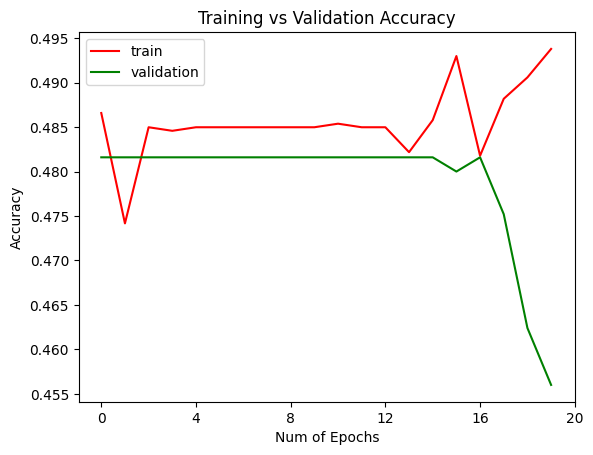

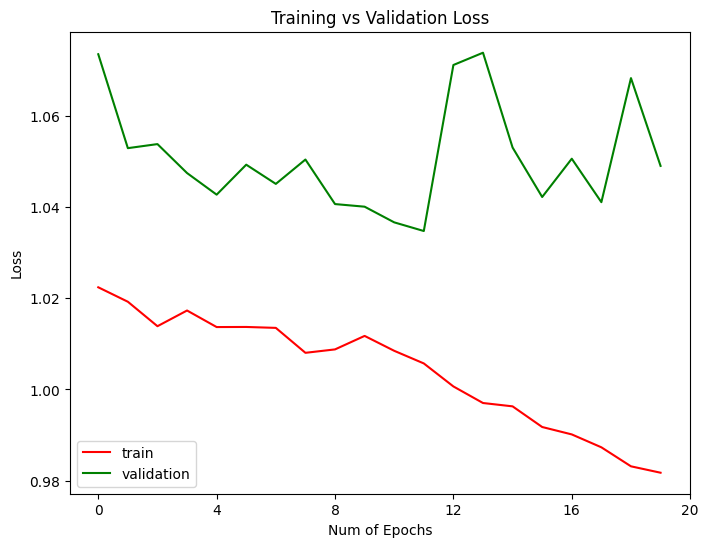

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
[0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0,

In [18]:
# Long Short-Term Memory for Sentiment Analysis task
# Define necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, confusion_matrix
from gensim.models import KeyedVectors
import gensim
import seaborn as sn
import pickle
import time
np.random.seed(7)

# Initializing process
print("Initializing...")
initial_time = time.time()

# Load dataset
filename = 'filmweb_jednolity_sentyment.csv'
dataset = pd.read_csv(filename, delimiter=",")
# Apply random permutation
dataset = dataset.sample(frac=1).reset_index(drop=True)
print(dataset.head())

# Delete unused column
# del dataset['length']

# Delete All NaN values from columns -> ['review','sentiment']
dataset = dataset[dataset['review'].notnull() & dataset['sentiment'].notnull()]

# Set all strings as lower case letters
dataset['review'] = dataset['review'].str.lower()

# Split data into training, test and validation set (60:20:20)
X = dataset['review']
y = dataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Print X, y train, test and validation shapes
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("X_val shape: " + str(X_val.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))
print("y_val shape: " + str(y_val.shape))

# Load existing word2vec model
from gensim.models import KeyedVectors

# Pobranie modelu
model_url = "https://huggingface.co/clarin-pl/word2vec-kgr10/resolve/main/skipgram.v300.m8.ns.mwe.w2v.gensim"
model_path = "word2vec-kgr10.gensim"

# Pobranie pliku
import urllib.request
urllib.request.urlretrieve(model_url, model_path)

# Download the vectors file separately
vectors_url = "https://huggingface.co/clarin-pl/word2vec-kgr10/resolve/main/skipgram.v300.m8.ns.mwe.w2v.gensim.vectors.npy" # URL of the vectors file
vectors_path = "word2vec-kgr10.gensim.vectors.npy" # Local path for the vectors file
urllib.request.urlretrieve(vectors_url, vectors_path)

# Załadowanie modelu
word2vec_model = KeyedVectors.load(model_path)
# word2vec_model = KeyedVectors.load_word2vec_format('nkjp.txt', binary=False)

# Define embedding matrix
embedding_matrix = word2vec_model.vectors
print('Shape of embedding matrix: ', embedding_matrix.shape)

# Vectorize X_train and X_test to 2D tensor
top_words = embedding_matrix.shape[0]

# Define max length of sentence and number of classes (negative, neutral and positive)
mxlen = 30
nb_classes = 3

tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(word_index)

X_train = sequence.pad_sequences(sequences_train, maxlen=mxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=mxlen)
X_val = sequence.pad_sequences(sequences_val, maxlen=mxlen)

# Convert labels to categorical
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)
y_val = to_categorical(y_val, nb_classes)

"""Embedding layer: this layer can only be used as the first layer in a model.
   Arguments:
        input_dim: int > 0.
        output_dim: int >=0.
"""
embedding_layer = Embedding(embedding_matrix.shape[0],
                           embedding_matrix.shape[1],
                           weights=[embedding_matrix],
                           trainable=False)

"""Define Neural Network Architecture.
   Layers:
        embedding_layer: (embedding_matrix.shape[0], embedding_matrix.shape[1])
        LSTM1: (neurons, dropout, recurrent_dropout, return_sequences)
        LSTM2: (neurons, dropout, recurrent_dropout)
        Dense1: Full-connected layer (neurons, activation function)
        Dense2: Full-connected layer (neurons on output)
        Activation: (activation function)
"""
nb_epoch = 20
batch_size = 32

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(nb_classes, activation='sigmoid'))
model.summary()

t0 = time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,
                   shuffle=True, validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val)

# Save model as file with .h5 extension
print('Save model...')
model.save('test_model.h5')
print('Saved model to disk...')

# Save word index as pickle file
print('Save Word index...')
with open('finalwordindex.pkl', 'wb') as output:
    pickle.dump(word_index, output)
print('Saved word index to disk...')

t1 = time.time()
print("Test Loss: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))

print("Training completed in :" + str(t1-t0) + " s.")

# Plots for training and testing process: loss and accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.xticks(np.arange(0, nb_epoch+1, nb_epoch//5))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train', 'validation'])
plt.savefig('accuracy_plot.png')

plt.figure(1)
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.xticks(np.arange(0, nb_epoch+1, nb_epoch//5))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train', 'validation'])
plt.savefig('loss_plot.png')
plt.show()

# Apply Precision-Recall
y_pred = model.predict(X_val)

# Convert Y_Test into 1D array
yy_true = [np.argmax(i) for i in y_val]
print(yy_true)

yy_scores = [np.argmax(i) for i in y_pred]
print(yy_scores)

print("Recall: " + str(recall_score(yy_true, yy_scores, average='weighted')))
print("Precision: " + str(precision_score(yy_true, yy_scores, average='weighted')))
print("F1 Score: " + str(f1_score(yy_true, yy_scores, average='weighted')))